In [ ]:
# Observable trends based on the data:
    
# 1. In the Max_temp vs Latitude plot, I noticed more number of points on the right hand side than the left. 
# This is because there are more cities and more land on the northern hemisphere than southern. 
# More cities exists farther north than south. 
# The graph is bent more on the right hand side with even lower temperatures as they are closer to the north pole.

# 2. In the Max_temp vs Latitude plot, Wind speed is low on/closer to the equater as compared to both sides. 
# Similar trend is not observed for the humidity and cloudiness plots. 

# 3. In the Max_temp vs Latitude plot, did not find any outliers as the graph is very prominent with 
# higher temps close to the equater and lower on left and right sides. 
# Extreme climate conditions resulting from global warming would need more historical data to prove. 

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 
from citipy import citipy as cp
import pandas as pd
import requests as req
import json
import time
import seaborn as sns

In [20]:
#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [21]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [22]:
samplecity

,city,country
7937,oksfjord,no
805,manica,mz
7674,solvychegodsk,ru
1054,livramento,br
3451,lalmohan,bd
7638,sandavagur,fo
2097,kumba,cm
5074,sun valley,us
7912,myre,no
3093,barbar,sd


In [23]:
apikey = 'dbf03c8aa578b5077b6964aa9ffdba0e'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

C:\Users\apandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\apandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\apandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\apandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\apandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\apandhi\Ana

This is city#: 1
This is: oksfjord
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=oksfjord
This is city#: 2
This is: manica
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=manica
This is city#: 3
This is: solvychegodsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=solvychegodsk
This is city#: 4
This is: livramento
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=livramento
This is city#: 5
This is: lalmohan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=lalmohan
No data for this city: sandavagur
This is city#: 6
This is: sandavagur
This is the requested URL: http://api.openweather

This is city#: 47
This is: middlebury
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=middlebury
This is city#: 48
This is: kedrovyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=kedrovyy
This is city#: 49
This is: samana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=samana
This is city#: 50
This is: dilla
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=dilla
This is city#: 51
This is: diu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=diu
This is city#: 52
This is: igurubi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9f

This is city#: 93
This is: selenginsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=selenginsk
This is city#: 94
This is: shelburne
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=shelburne
This is city#: 95
This is: stephenville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=stephenville
This is city#: 96
This is: ha giang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=ha giang
This is city#: 97
This is: belem de sao francisco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=belem de sao francisco
This is city#: 98
This is: dongying
This is the requested URL: http://api.openweath

This is city#: 139
This is: damietta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=damietta
This is city#: 140
This is: hondo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=hondo
This is city#: 141
This is: honolulu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=honolulu
This is city#: 142
This is: firminy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=firminy
This is city#: 143
This is: klaebu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=klaebu
This is city#: 144
This is: port said
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5

No data for this city: bafra
This is city#: 186
This is: bafra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=bafra
This is city#: 187
This is: biggar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=biggar
This is city#: 188
This is: port lavaca
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=port lavaca
This is city#: 189
This is: kupino
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=kupino
This is city#: 190
This is: dubrovnik
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=dubrovnik
This is city#: 191
This is: mahasamund
This is the requested URL: http://api.openweathermap.org/d

This is city#: 232
This is: serabu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=serabu
This is city#: 233
This is: kodinsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=kodinsk
No data for this city: sansai
This is city#: 234
This is: sansai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=sansai
This is city#: 235
This is: loding
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=loding
This is city#: 236
This is: chitungwiza
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=chitungwiza
This is city#: 237
This is: sibut
This is the requested URL: http://api.openweathermap.org/data/2.

This is city#: 278
This is: cobija
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=cobija
This is city#: 279
This is: ylivieska
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=ylivieska
This is city#: 280
This is: luang prabang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=luang prabang
No data for this city: mbacke
This is city#: 281
This is: mbacke
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=mbacke
This is city#: 282
This is: hikari
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=hikari
This is city#: 283
This is: flinders
This is the requested URL: http://api.openweathermap.

This is city#: 324
This is: bunbury
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=bunbury
No data for this city: koyilandi
This is city#: 325
This is: koyilandi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=koyilandi
No data for this city: chaochou
This is city#: 326
This is: chaochou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=chaochou
No data for this city: kavant
This is city#: 327
This is: kavant
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=kavant
This is city#: 328
This is: ayame
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=ayame
This is city#: 329
This is: tabas
T

This is city#: 370
This is: taldan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=taldan
This is city#: 371
This is: simoes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=simoes
This is city#: 372
This is: miguelopolis
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=miguelopolis
This is city#: 373
This is: mataura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=mataura
This is city#: 374
This is: idritsa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=idritsa
This is city#: 375
This is: general pico
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf

This is city#: 416
This is: santa ines
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=santa ines
This is city#: 417
This is: narsaq
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=narsaq
This is city#: 418
This is: san juan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=san juan
This is city#: 419
This is: cooma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=cooma
This is city#: 420
This is: khromtau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=khromtau
This is city#: 421
This is: susehri
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa5

This is city#: 462
This is: nelson bay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=nelson bay
No data for this city: tsentralnyy
This is city#: 463
This is: tsentralnyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=tsentralnyy
This is city#: 464
This is: sosnovo-ozerskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=sosnovo-ozerskoye
No data for this city: yomitan
This is city#: 465
This is: yomitan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=yomitan
This is city#: 466
This is: pennagaram
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dbf03c8aa578b5077b6964aa9ffdba0e&units=Imperial&q=pennagaram
This is city#: 467
This 

In [29]:
samplecity = samplecity[samplecity.latitude != ""]
samplecity.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
7937,oksfjord,no,70,70,42,70,75,10
805,manica,mz,-18,-18,60,82,0,4
7674,solvychegodsk,ru,61,61,38,82,0,3
1054,livramento,br,-3,-3,85,70,20,3
3451,lalmohan,bd,22,22,83,93,92,5


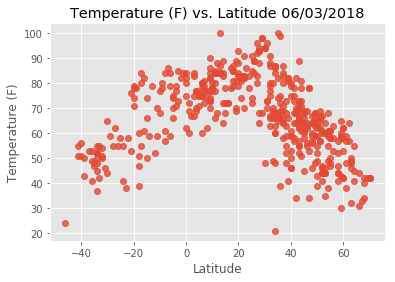

In [41]:
# import datetime
# date = datetime.date.today()
date = time.strftime("%m/%d/%Y")
# print(date)
# plt.scatter(samplecity['latitude'],samplecity['temperature'])

sns.regplot(x=samplecity['latitude'], y=samplecity['temperature'], fit_reg=False)
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.grid(True)
plt.show()

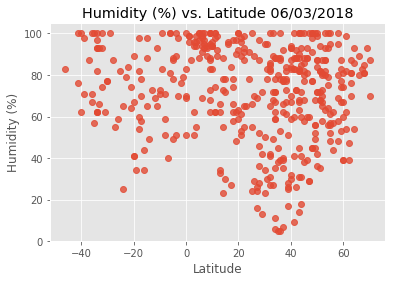

In [37]:
# plt.scatter(latitude,humidity)
sns.regplot(x=samplecity['latitude'], y=samplecity['humidity'], fit_reg=False)
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.grid(True)
plt.savefig("Humidity.png")
plt.show()

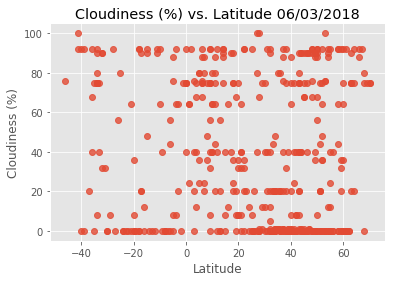

In [38]:
# plt.scatter(latitude,cloudy)
sns.regplot(x=samplecity['latitude'], y=samplecity['cloudiness'], fit_reg=False)
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.grid(True)
plt.savefig("Cloudiness.png")
plt.show()

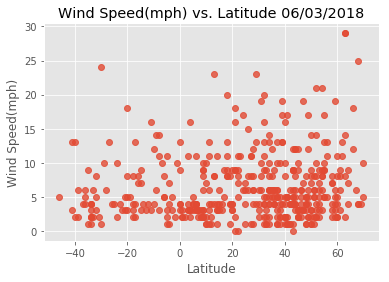

In [39]:
# plt.scatter(latitude,windspeed)
sns.regplot(x=samplecity['latitude'], y=samplecity['wind_speed'], fit_reg=False)
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.grid(True)
plt.savefig("Wind_Speed.png")
plt.show()

In [ ]:
# samplecity = samplecity[samplecity.latitude != ""]
#above works to remove blank answers
#Make into CSV
samplecity.to_csv("cityweather_data.csv", encoding="utf-8", index=False)
df = pd.read_csv("cityweather_data.csv")
df.head()